In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path ="/content/drive/MyDrive/MSc Data Science/7050CEM-Project/"

******###### DATA PREPARATION #####*******


*   In this section the files *mcs7_cm_interview, mcs7_cm_derived, mcs7_family_derived, and mcs7_qualifications* are preprocessing and relevant variables for our project are extracted.








Extraction of relevant variables from the files:
*   mcs7_cm_interview,
*   mcs7_family_derived,
*   mcs7_cm_derived
*   mcs7_cm_qualifications







*   MCSID: Cohort Family ID
*   GCNUM00: cohort number in the family.
*   GCEDUC00: Are you going to school/College
*   GCCLSI00: Physical or Mental Illness in last 12 months
*   GCGNID00: Gender (1:Male, 2:Female, 3:Other, 4:Adrogynous, 5:Gender fluid, 6: Non binary)
*   GCSXID00: Sex orientation
  



















In [10]:
####### Dataframe from mcs7_cm_interview ##########################

## Variables to extract from the mcs7_cm_interview file

cols_cm = ["MCSID", "GCNUM00", "GCEDUC00","GCCLSI00","GCGNID00", "GCSXID00"]

cm_interview = pd.read_csv(path+"mcs7_cm_interview.tab", sep='\t', usecols=cols_cm)
cm_interview.shape



(10343, 6)

The variable GCNUM00 represents the Cohort Member number in the family MCSID.
For simplicity we will use only the Cohort Member GCNUM00=1

In [11]:
# Keep only the Cohort Member GCNUM00 = 1
cm_interview = cm_interview[cm_interview["GCNUM00"]==1]

#Drop the column GCNUM00
cm_interview.drop(columns=["GCNUM00"], inplace=True)
print("Remaining samples after cleansing of 'GCNUM00':", cm_interview.shape[0])

Remaining samples after cleansing of 'GCNUM00': 10236


In [12]:
# Handling of missing values

# 1. Reformatting of missing values
# 3: Don't know, 4:Do not wish to answer, 5:Refusal
cm_interview[["GCEDUC00", "GCCLSI00"]] = \
    cm_interview[["GCEDUC00", "GCCLSI00"]].replace([3,4,5], np.nan)
# -9:Prefer not to say/Refusal, -8:Don't know, -1:Not applicable, 7: Irrelevant
cm_interview["GCGNID00"] = cm_interview["GCGNID00"].replace([-9,-8,-1,7], np.nan)
# -1: Not applicable, 7:Do not know, 8:Prefer not to say
cm_interview["GCSXID00"] = cm_interview["GCSXID00"].replace([-1,7,8], np.nan)
# -9: Refusal, -8: Do not know, -1: Not applicable
cm_interview["GCSXID00"] = cm_interview["GCSXID00"].replace([3,4,5], np.nan)

# 2. Drop missing values or variables
cm_interview.isna().sum()
cm_interview.dropna(inplace=True)
cm_interview.isna().sum()

,0
MCSID,0
GCEDUC00,0
GCCLSI00,0
GCSXID00,0
GCGNID00,0


In [13]:
cm_interview.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8794 entries, 0 to 10342
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MCSID     8794 non-null   object 
 1   GCEDUC00  8794 non-null   float64
 2   GCCLSI00  8794 non-null   float64
 3   GCSXID00  8794 non-null   float64
 4   GCGNID00  8794 non-null   float64
dtypes: float64(4), object(1)
memory usage: 412.2+ KB


**File: mcs7_family_derived**



*   MCSID: Chohort Id
*   GDHTYP00 : parents structure
*   GDTOTP00: Number of people in the family (including cohort)






In [14]:
####### Dataframe from mcs7_family_derived #########################,#

# Variables to extract from the mcs7_family_derived file
cols_fam_der =["MCSID", "GDHTYP00","GDTOTP00"]

family_derived = pd.read_csv(path+"mcs7_family_derived.tab", sep='\t', usecols=cols_fam_der)
family_derived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10830 entries, 0 to 10829
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MCSID     10830 non-null  object
 1   GDHTYP00  10830 non-null  int64 
 2   GDTOTP00  10830 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 254.0+ KB


In [15]:
# Handling of missing values

# 1. Reformatting of missing values
# -1: missing
family_derived["GDHTYP00"] = family_derived["GDHTYP00"].replace(-1, np.nan)
# -2:Do not know
family_derived["GDTOTP00"] = family_derived["GDTOTP00"].replace(-2, np.nan)


# 2. Drop missing values or variables
print(family_derived.isna().sum())
family_derived.dropna(inplace=True)


MCSID         0
GDHTYP00    441
GDTOTP00      0
dtype: int64


In [16]:
family_derived.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10389 entries, 0 to 10829
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MCSID     10389 non-null  object 
 1   GDHTYP00  10389 non-null  float64
 2   GDTOTP00  10389 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 324.7+ KB




---


**File: mcs7_cm_derived**


---





*   MCSID: Cohort Id
*   GCNUM00: Cohort number in the family
*   GCMCS7AG: Age of the Cohort
*   GCUK90O7: Weight status
*   GDCKESSL: K6 score

In [17]:
####### Dataframe from mcs7_cm_derived ##########################

# cm_derived: data relating to depression: mcs7_cm_derived
cols_cm_der = ["MCSID","GCNUM00", "GCMCS7AG", "GCUK90O7", "GDCKESSL"]

cm_derived = pd.read_csv(path+"mcs7_cm_derived.tab", sep='\t', usecols=cols_cm_der)
cm_derived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10948 entries, 0 to 10947
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MCSID     10948 non-null  object 
 1   GCNUM00   10948 non-null  int64  
 2   GCMCS7AG  10948 non-null  float64
 3   GCUK90O7  10948 non-null  int64  
 4   GDCKESSL  10948 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 427.8+ KB


In [18]:
# Choose only GCNUM00 =1
cm_derived = cm_derived[cm_derived["GCNUM00"]==1]
cm_derived.drop(columns=["GCNUM00"], inplace=True)
cm_derived.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10827 entries, 0 to 10947
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MCSID     10827 non-null  object 
 1   GCMCS7AG  10827 non-null  float64
 2   GCUK90O7  10827 non-null  int64  
 3   GDCKESSL  10827 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 422.9+ KB


In [19]:
# Handling of missing values

# 1. Reformatting of missing values
# -1:Missing/ Not applicable
cm_derived[["GCMCS7AG", "GCUK90O7"]] = \
   cm_derived[["GCMCS7AG", "GCUK90O7"]].replace(-1, np.nan)
# -9:Refusal, -8:Don't know, -1:Not applicable
cm_derived['GDCKESSL'] = cm_derived['GDCKESSL'].replace([-9,-8,-1], np.nan)


# 2. Drop missing values or variables
print(cm_derived.isna().sum())
cm_derived.dropna(inplace=True)

MCSID          0
GCMCS7AG     218
GCUK90O7    1505
GDCKESSL     842
dtype: int64


In [20]:
cm_derived.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9257 entries, 0 to 10947
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MCSID     9257 non-null   object 
 1   GCMCS7AG  9257 non-null   float64
 2   GCUK90O7  9257 non-null   float64
 3   GDCKESSL  9257 non-null   float64
dtypes: float64(3), object(1)
memory usage: 361.6+ KB


**File: mcs7_cm_qualifications**

---
We are only concerned with the ranking grades obtained on GCSE/National Five


*   MCSID: Cohort Id
*   GCNUM00: Cohort number in the family
*   GC_L_GCGD: GCSE Subject Grade (En, Wa, NI)
*   GC_L_FVGD: N5 Subject grade (Scot)
*   GC_S_QUAL_GCSN_R20: Total GCSEs obtained (En, Wa, NI)
*   GC_S_QUAL_NFIR_R20: Total N5s obtained (Scot)


In [21]:
####### Dataframe from mcs7_cm_qualifications ##########################

# Variables related to school performance: mcs7_cm_qualifications
cols_qualif =['MCSID', 'GCNUM00', 'GC_L_GCGD', 'GC_L_FVGD', "GC_S_QUAL_GCSN_R20", "GC_S_QUAL_NFIR_R20" ]

cm_qualifications = pd.read_csv(path+'mcs7_cm_qualifications.tab', sep='\t', usecols=cols_qualif)
cm_qualifications.shape

(199500, 6)

In [22]:
# Drop all rows where GCNUM00 = 2
# we are only taking the Cohort Member GCNUM00=1 per family
cm_qualifications = cm_qualifications[cm_qualifications["GCNUM00"] == 1]
cm_qualifications.drop(columns=["GCNUM00"], inplace=True)
cm_qualifications.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197460 entries, 0 to 199499
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   MCSID               197460 non-null  object
 1   GC_S_QUAL_GCSN_R20  197460 non-null  int64 
 2   GC_S_QUAL_NFIR_R20  197460 non-null  int64 
 3   GC_L_GCGD           197460 non-null  int64 
 4   GC_L_FVGD           197460 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 9.0+ MB


In [23]:
#### FEATURE ENGINEERING OF QUALIFICATION VARIABLES #####################

##### Feature Engineering of the variables A_Grades
# Step 1: Create the GCSE_N5_Grade column

# Remove rows where both grade columns are missing
cm_qualifications = cm_qualifications.replace(-1, np.nan)
cm_qualifications = cm_qualifications.dropna(subset=["GC_L_GCGD", "GC_L_FVGD"], how="all")

# The column takes the grade from GCSE (GC_L_GCGD) or N5 (GC_L_FVGD) if in Scotland.
cm_qualifications["GCSE_N5_Grade"] = cm_qualifications.apply(
    lambda row: "A" if row["GC_L_GCGD"] in [12, 11, 9, 8, 7] or row["GC_L_FVGD"] == 1
    else None,
      axis=1
)

# Step 2: Count how many 'A' grades (A*, A) each unique MCSID has
A_counts = (
    cm_qualifications[cm_qualifications["GCSE_N5_Grade"] == "A"]
    .groupby("MCSID", as_index=False)
    .size()
    .rename(columns={"size": "A_Grades"})
)

# Step 4: Drop duplicate MCSIDs, keeping only the first occurrence
qualif_unique = cm_qualifications.drop_duplicates(subset="MCSID", keep="first").reset_index(drop=True)

# Drop the the columns used on features engineering
qualif_unique = qualif_unique.drop(columns=["GC_L_GCGD", "GC_L_FVGD", "GCSE_N5_Grade"])

# Step 5: Merge both A_Grade into the unique dataframe
qualif_final = qualif_unique.merge(A_counts, on="MCSID", how="left")

# Step 6: Fill NaNs with 0 and convert to integers
qualif_final["A_Grades"] = qualif_final["A_Grades"].fillna(0).astype(int)


# Merging of equivalent Qualification from Scotland and the rest of the UK into a common qualification
############## Functions to select the adequate Qualification value #############################################

def Choose_Qualif(row, qualif_uk, qualif_scot):
  """
    Return qualification count from UK (GCSE) or Scotland (Nat5) columns.
    Missing codes: -8 = 'Don't Know', -9 = 'Refused' → treated as NaN.
    Logic:
      1. If UK value is valid (not -1, -8, -9) → use UK.
      2. Else if Scottish value is valid (not -1, -8, -9) → use Scottish.
      3. Otherwise → NaN.
    """
  # Handle missing codes by treating them as NaN
  uk_val = np.nan if row[qualif_uk] in [-8, -9] else row[qualif_uk]
  scot_val = np.nan if row[qualif_scot] in [-8, -9] else row[qualif_scot]

  # Decision hierarchy
  if pd.notna(uk_val) and uk_val != -1:
      return uk_val
  elif pd.notna(scot_val) and scot_val != -1:
      return scot_val
  else:
      return np.nan
##############################################################################################
# Total Number of GCSEs or National Fives
qualif_final["Total_GCSE_N5"] = qualif_final.apply(lambda row:Choose_Qualif(row, "GC_S_QUAL_GCSN_R20","GC_S_QUAL_NFIR_R20"), axis=1)
# Drop columns
qualif_final.drop(columns=["GC_S_QUAL_GCSN_R20", "GC_S_QUAL_NFIR_R20"], inplace=True)

# Drop Missing values
qualif_final.dropna(inplace=True)

qualif_final.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9315 entries, 0 to 9316
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MCSID          9315 non-null   object 
 1   A_Grades       9315 non-null   int64  
 2   Total_GCSE_N5  9315 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 291.1+ KB


In [24]:
# Combine the three dataframes in one using MCSID
final_data = pd.merge(cm_interview, family_derived, on="MCSID")
final_data = pd.merge(final_data, cm_derived, on="MCSID")
final_data = pd.merge(final_data, qualif_final, on="MCSID")
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7794 entries, 0 to 7793
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MCSID          7794 non-null   object 
 1   GCEDUC00       7794 non-null   float64
 2   GCCLSI00       7794 non-null   float64
 3   GCSXID00       7794 non-null   float64
 4   GCGNID00       7794 non-null   float64
 5   GDHTYP00       7794 non-null   float64
 6   GDTOTP00       7794 non-null   int64  
 7   GCMCS7AG       7794 non-null   float64
 8   GCUK90O7       7794 non-null   float64
 9   GDCKESSL       7794 non-null   float64
 10  A_Grades       7794 non-null   int64  
 11  Total_GCSE_N5  7794 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 730.8+ KB


In [25]:
# Save the dataset in a csv files
final_data.to_csv('7050CEM_Ado_Depression_Pred.csv', index=False)

**FINAL DATASET: EXPLORATIVE DATA ANALYSIS**





**DATA CLEANING**

**Checking and Handling of Duplicates**

In [26]:

# 1. Handling of duplicates
print ("Number of duplicates:", final_data.duplicated().sum())
# Removal of duplicates
final_data.drop_duplicates(inplace=True)
print ("Number of rows after duplicates removal:", final_data.shape[0])


Number of duplicates: 0
Number of rows after duplicates removal: 7794


In [27]:
#  Removal of Identifiers
final_data = final_data.drop(columns="MCSID")

**Handling of Missing Values**

In [28]:
final_data.isna().sum()

,0
GCEDUC00,0
GCCLSI00,0
GCSXID00,0
GCGNID00,0
GDHTYP00,0
GDTOTP00,0
GCMCS7AG,0
GCUK90O7,0
GDCKESSL,0
A_Grades,0


In [29]:
# Drop all the missing values
final_data = final_data.dropna()
final_data.isna().sum()

,0
GCEDUC00,0
GCCLSI00,0
GCSXID00,0
GCGNID00,0
GDHTYP00,0
GDTOTP00,0
GCMCS7AG,0
GCUK90O7,0
GDCKESSL,0
A_Grades,0


**---- CLEANED DATASET ----** (No duplicates or missing values)

In [30]:
cleaned_data = final_data

# Save file
cleaned_data.to_csv('7050CEM_Ado_Depression_Pred_Cleaned.csv', index=False)

In [31]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7794 entries, 0 to 7793
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GCEDUC00       7794 non-null   float64
 1   GCCLSI00       7794 non-null   float64
 2   GCSXID00       7794 non-null   float64
 3   GCGNID00       7794 non-null   float64
 4   GDHTYP00       7794 non-null   float64
 5   GDTOTP00       7794 non-null   int64  
 6   GCMCS7AG       7794 non-null   float64
 7   GCUK90O7       7794 non-null   float64
 8   GDCKESSL       7794 non-null   float64
 9   A_Grades       7794 non-null   int64  
 10  Total_GCSE_N5  7794 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 669.9 KB


**Variables Description**

In [32]:
numerical_cols = ['Total_GCSE_N5', 'A_Grades', 'GCMCS7AG','GDTOTP00', 'GDCKESSL']
categorical_cols = final_data.columns.difference(numerical_cols)

# Transform dtype of categorical variables into 'category'
cleaned_data[categorical_cols] = cleaned_data[categorical_cols].astype('category')
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7794 entries, 0 to 7793
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   GCEDUC00       7794 non-null   category
 1   GCCLSI00       7794 non-null   category
 2   GCSXID00       7794 non-null   category
 3   GCGNID00       7794 non-null   category
 4   GDHTYP00       7794 non-null   category
 5   GDTOTP00       7794 non-null   int64   
 6   GCMCS7AG       7794 non-null   float64 
 7   GCUK90O7       7794 non-null   category
 8   GDCKESSL       7794 non-null   float64 
 9   A_Grades       7794 non-null   int64   
 10  Total_GCSE_N5  7794 non-null   float64 
dtypes: category(6), float64(3), int64(2)
memory usage: 351.7 KB


**Summary Statistic**

In [33]:
# For numerical variables
cleaned_data[numerical_cols].describe()

,Total_GCSE_N5,A_Grades,GCMCS7AG,GDTOTP00,GDCKESSL
count,7794.000000,7794.000000,7794.000000,7794.000000,7794.000000
mean,8.119194,2.515012,17.163677,5.219528,6.785733
std,2.690509,3.204016,0.327249,1.305183,4.621406
min,1.000000,0.000000,16.200000,3.000000,0.000000
25%,7.000000,0.000000,16.900000,4.000000,3.000000
50%,9.000000,1.000000,17.200000,5.000000,6.000000
75%,10.000000,4.000000,17.400000,6.000000,10.000000
max,17.000000,15.000000,18.200000,14.000000,24.000000


In [34]:
# For categorical variables
cleaned_data[categorical_cols].describe()

,GCCLSI00,GCEDUC00,GCGNID00,GCSXID00,GCUK90O7,GDHTYP00
count,7794.0,7794.0,7794.0,7794.0,7794.0,7794.0
unique,2.0,2.0,6.0,3.0,4.0,18.0
top,2.0,1.0,1.0,1.0,2.0,1.0
freq,6681.0,7203.0,3965.0,6761.0,4961.0,5077.0


**EDA of Numerical variables**


1.   **Data Distribution (Skewness of dataset)**



In [35]:
# Skewness of numerical variables
print('Skewness of numerical ')
cleaned_data[numerical_cols].skew().sort_values(ascending=False)

Skewness of numerical 


,0
A_Grades,1.254937
GDTOTP00,0.939456
GDCKESSL,0.796081
GCMCS7AG,0.064349
Total_GCSE_N5,-0.614413


2.   **Visualisation and Outliers Detection**



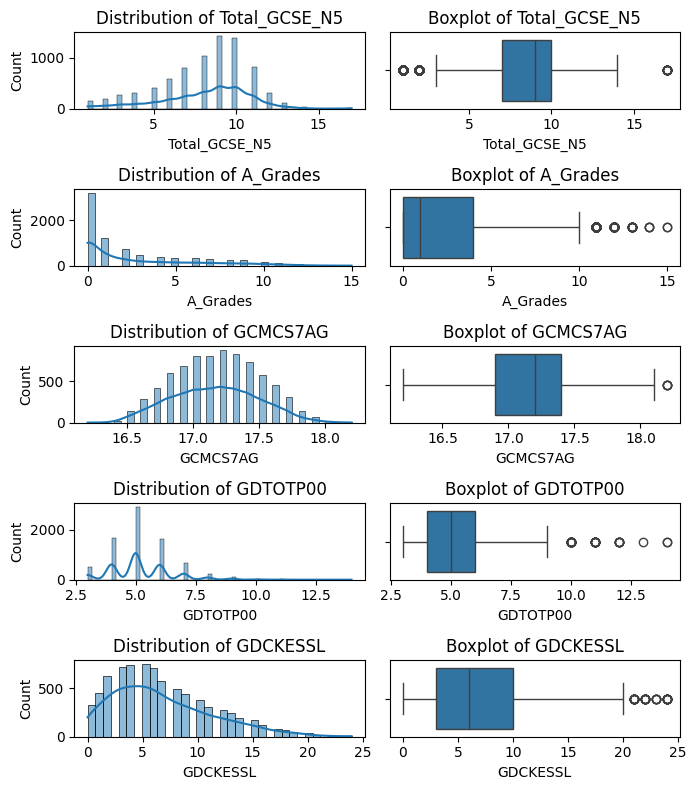

In [36]:
# Visualisation and Outliers Detection
# Adjust figure size
num_cols = len(numerical_cols)
plt.figure(figsize=(7, 8)) # Adjusted figure height

for i, column in enumerate(numerical_cols): # Use enumerate to get index and column
    plt.subplot(num_cols, 2, i * 2 + 1) # Use num_cols for rows and i for indexing
    sns.histplot(cleaned_data[column], kde=True)
    plt.title(f'Distribution of {column}')

    plt.subplot(num_cols, 2, i * 2 + 2) # Use num_cols for rows and i for indexing
    sns.boxplot(x=cleaned_data[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

4.   **Correlation Matrix (Heatmap)**




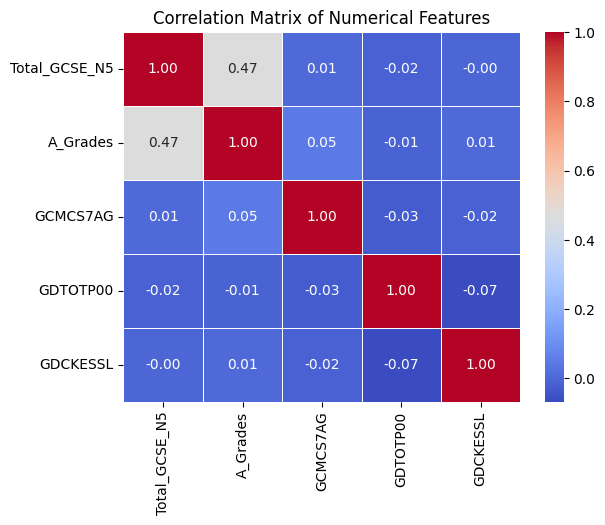

In [37]:
# Calculate correlation matrix
corr_matrix = cleaned_data[numerical_cols].corr()

# Visualise correlation matrix
plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()




**Visualisation of Categorical variables**











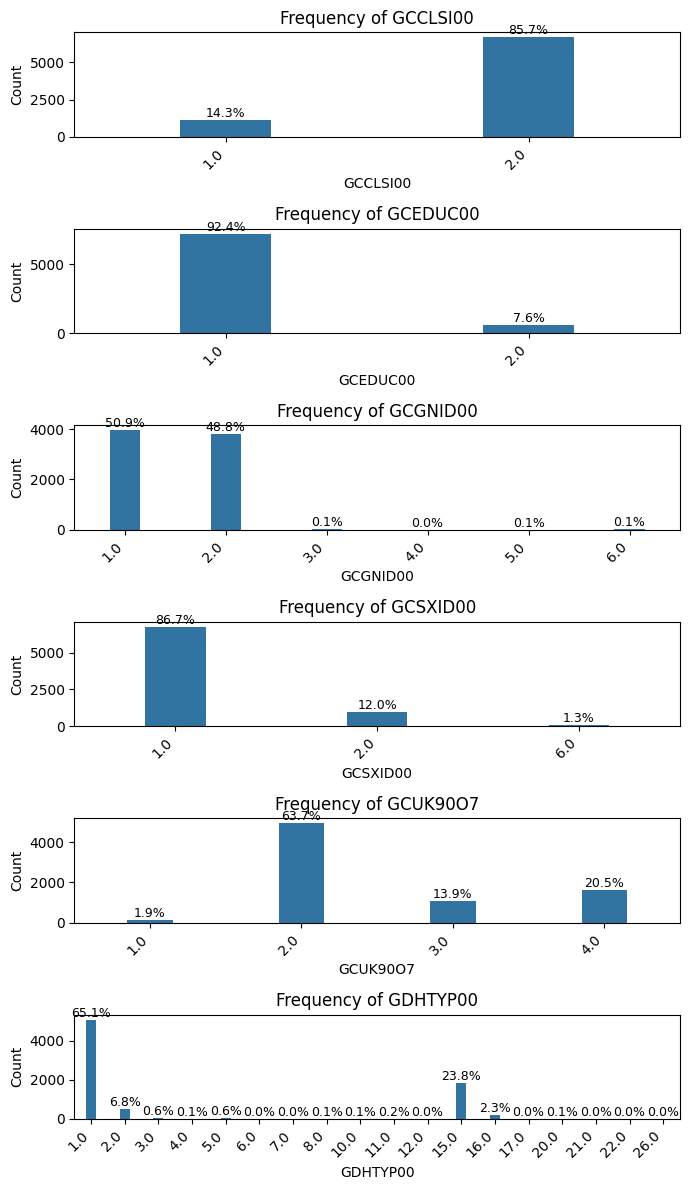

In [38]:
plt.figure(figsize=(7,12))
for i, column in enumerate(categorical_cols):
    if column == 'Depression': continue # Skip the variable 'Depression'
    plt.subplot(len(categorical_cols), 1, i+1)
    ax = sns.countplot(x=column, data=cleaned_data, width=0.3)
    # Add percentage labels above bars
    for p in ax.patches:
       height = p.get_height()
       percentage = (height / len(cleaned_data[column])) * 100
       ax.annotate(f'{percentage:.1f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9)
       plt.title(f'Frequency of {column}')
       plt.xticks(rotation=45, ha='right')
       plt.ylabel('Count')
       plt.tight_layout()
plt.show()

**Variable 'Depression' Engineering**



---





We will use the KESSLER K6 (GDCKESSL) for feature engineering of the target Depression







In [39]:
#### FEATURE ENGINEERING OF THE TARGET VARIABLE "Depression"

# Create a binary Depression : 1 = Depressed (GDCKESSL >= 13), 0 = Non-Depressed (GDCKESSL < 13)
cleaned_data["Depression"] = np.where(cleaned_data["GDCKESSL"] >= 13, 1, 0)

# Drop the variable GDCKESSL
cm_derived.drop(columns="GDCKESSL", inplace=True)
# Update numerical_cols and categorical_cols
numerical_cols.remove("GDCKESSL")
categorical_cols = categorical_cols.tolist()
categorical_cols.append("Depression")

/tmp/ipython-input-3880886819.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Depression', data=cleaned_data, palette=colours)


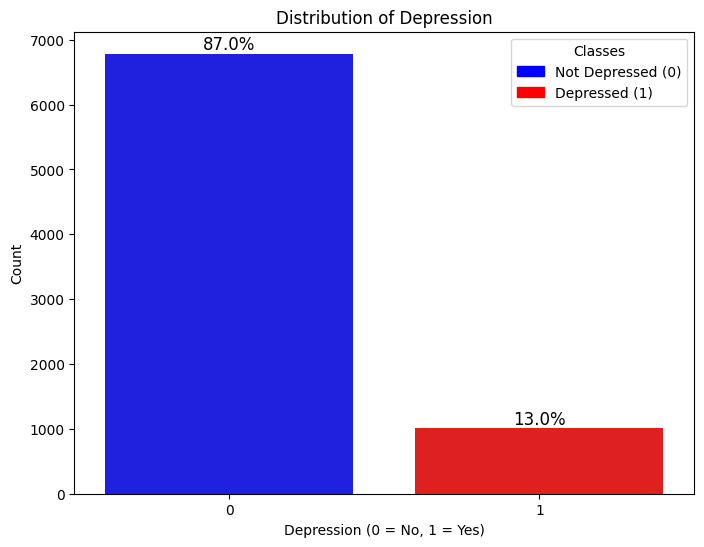

In [40]:
# Visualisation of the target variable Depression
plt.figure(figsize=(8, 6))
# Custom colours for the 2 bars
colours = ['blue', 'red']   # Blue for 0, Orange for 1

ax = sns.countplot(x='Depression', data=cleaned_data, palette=colours)
# Add percentage labels
total = len(cleaned_data)
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2., count),
                ha='center', va='bottom', fontsize=12)
plt.title("Distribution of Depression")
plt.xlabel("Depression (0 = No, 1 = Yes)")
plt.ylabel("Count")
# ---- Add Legend ----
handles = [
    plt.Rectangle((0, 0), 1, 1, color=colours[0]),
    plt.Rectangle((0, 0), 1, 1, color=colours[1])
]
plt.legend(handles, ["Not Depressed (0)", "Depressed (1)"], title="Classes")
plt.show()

Our Dataset is imbalance. We will make use of SMOTE for balancing during ours models building pipeline.

**Distribution of Variables against the target variable 'Depression'**

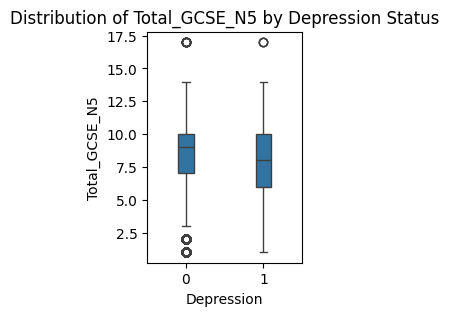

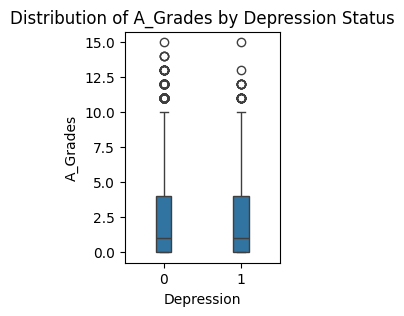

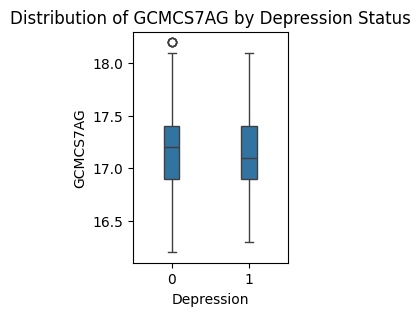

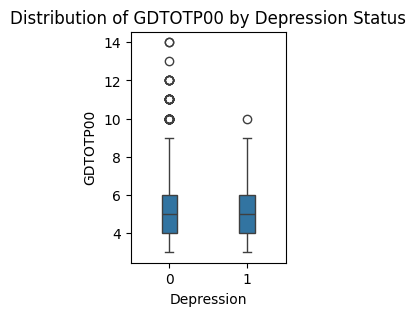

In [41]:
# Numerical variables vs 'Depression'

for var in numerical_cols:
        plt.figure(figsize=(2,3))
        sns.boxplot(x='Depression', y=var, data=cleaned_data, width=0.2)
        plt.title(f"Distribution of {var} by Depression Status")
        plt.xlabel("Depression")
        plt.ylabel(var)
        plt.show()

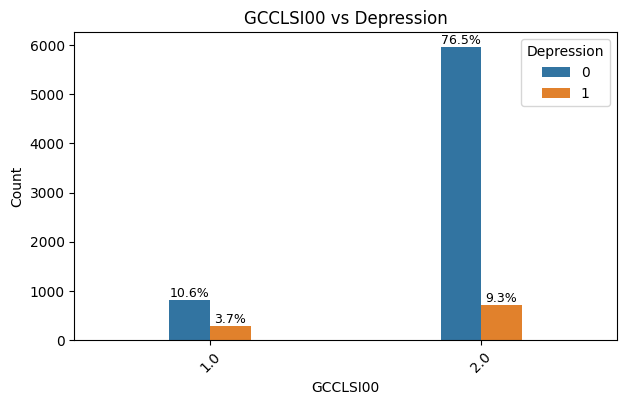

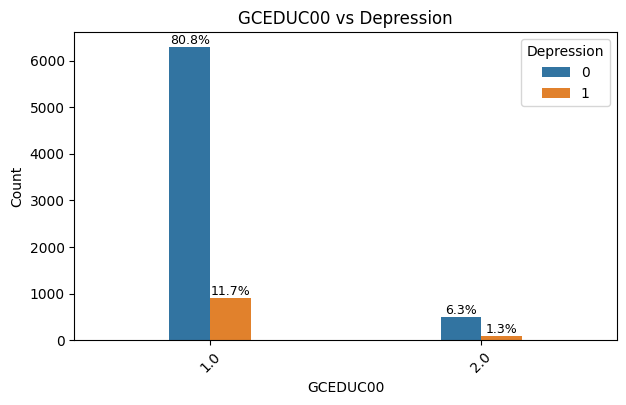

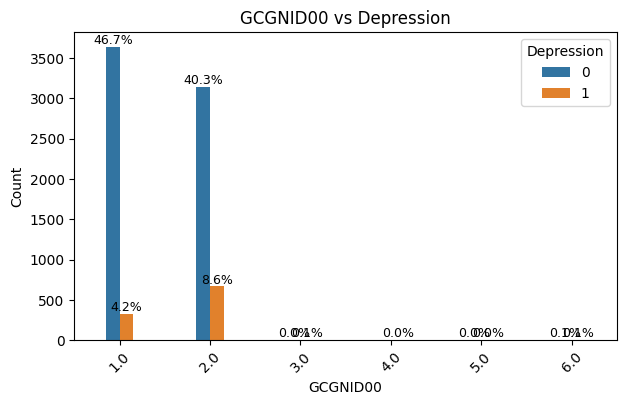

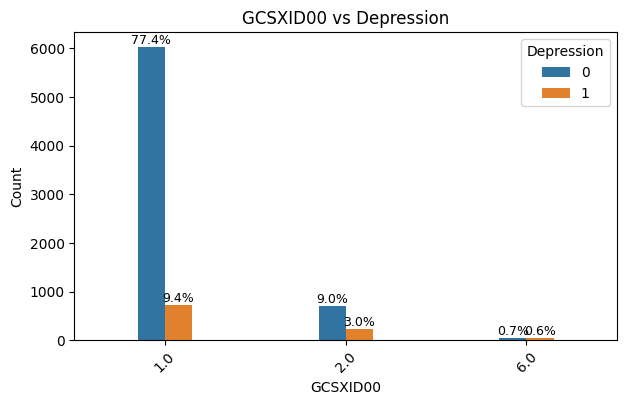

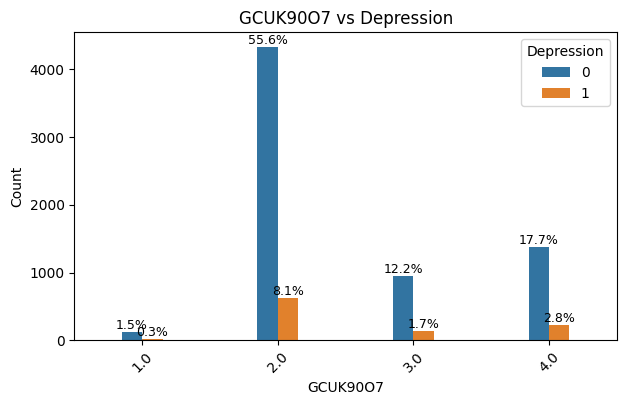

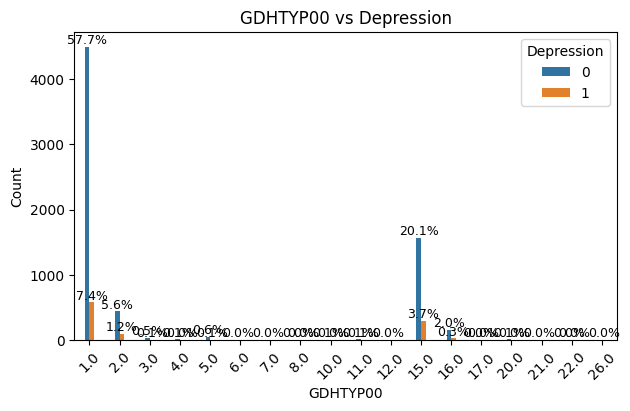

In [42]:
# Categorical variables

for var in categorical_cols:
    if var != 'Depression':
        plt.figure(figsize=(7,4))
        ax = sns.countplot(x=var, hue='Depression', dodge=True, width=0.3, data=cleaned_data)

        # --- Add percentage labels on each bar ---
        total_counts = cleaned_data['Depression'].value_counts(normalize=True) * 100

        for p in ax.patches:
            height = p.get_height()
            if height == 0:
              continue
            total = len(cleaned_data)
            percent = height / total * 100
            ax.annotate(f'{percent:.1f}%', (p.get_x() + p.get_width()/2., height),
                        ha='center', va='bottom', fontsize=9)
        plt.title(f"{var} vs Depression")
        plt.xlabel(var)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()

**Feature Significance vs Depression**

In [43]:
from scipy.stats import chi2_contingency, f_oneway

y = "Depression"
results = []  # <--- store p-values here
results_num = []
results_cat = []

In [44]:
# Chi Square for Cat variables
signif_cat_cols = []
for var in categorical_cols:
    if var != y:
        df = cleaned_data[[var, y]].dropna()
        if df[y].nunique() < 2 or df[var].nunique() < 2:
            continue

        contingency = pd.crosstab(df[var], df[y])
        chi2, p, dof, expected = chi2_contingency(contingency)
        if p < 0.05:
            results_cat.append([var, p, "Categorical"])
            signif_cat_cols.append(var)
print('\n Chi Square of Categorical variables')
for var, p, string in results_cat:
    print(f"{var:<20}  p-value = {p:.6f}  {'SIGNIFICANT ' if p < 0.05 else '✘'}")


 Chi Square of Categorical variables
GCCLSI00              p-value = 0.000000  SIGNIFICANT 
GCEDUC00              p-value = 0.002313  SIGNIFICANT 
GCGNID00              p-value = 0.000000  SIGNIFICANT 
GCSXID00              p-value = 0.000000  SIGNIFICANT 
GDHTYP00              p-value = 0.000015  SIGNIFICANT 


In [45]:
# One-Way ANOVA for num variables
signif_num_cols =[]
for var in numerical_cols:
    if var != y:
        df = cleaned_data[[var, y]].dropna()
        groups = [g[var].values for _, g in df.groupby(y, observed=False)]
        if len(groups) < 2 or any(len(g) < 2 for g in groups):
            continue

        F, p = f_oneway(*groups)
        if p < 0.05:
          results_num.append([var, p, "Numeric"])
          signif_num_cols.append(var)
print('\n One-Way ANOVA of Numerical variables')
for var, p, string in results_num:
    print(f"{var:<20}  p-value = {p:.6f}  {'SIGNIFICANT ' if p < 0.05 else '✘'}")




 One-Way ANOVA of Numerical variables
Total_GCSE_N5         p-value = 0.033717  SIGNIFICANT 
A_Grades              p-value = 0.044186  SIGNIFICANT 
GDTOTP00              p-value = 0.000336  SIGNIFICANT 


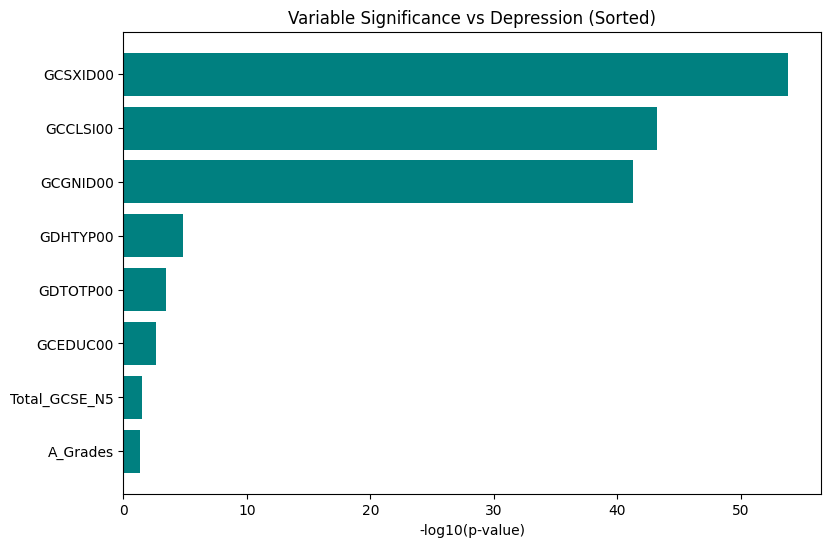

['GCCLSI00', 'GCEDUC00', 'GCGNID00', 'GCSXID00', 'GDHTYP00'] ['Total_GCSE_N5', 'A_Grades', 'GDTOTP00']


In [46]:
# Convert to DataFrame
results = results_cat + results_num
sig_df = pd.DataFrame(results, columns=["Variable", "p-value", "Type"])
sig_df.sort_values("p-value", inplace=True, ascending=False)
sig_df

# Convert p-value into -log10 scale for better visualization
sig_df["Significance"] = -np.log10(sig_df["p-value"])

# Plotting of Significant variables vs Depression
plt.figure(figsize=(9,6))
bars = plt.barh(sig_df["Variable"], sig_df["Significance"], color="teal")
plt.xlabel("-log10(p-value)")
plt.title("Variable Significance vs Depression (Sorted)")
plt.show()
print(signif_cat_cols, signif_num_cols)

In [47]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.5 MB/s eta 0:00:00


In [48]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop="first", sparse_output=False)
encoded_array = encoder.fit_transform(cleaned_data[signif_cat_cols])
# Build encoded dataframe
encoded_cat_df = pd.DataFrame(
    encoded_array,
    columns=encoder.get_feature_names_out(signif_cat_cols),
    index=cleaned_data.index
)
# Combine numeric + encoded categorical + target
encoded_data = pd.concat([cleaned_data[signif_num_cols], encoded_cat_df, cleaned_data["Depression"]], axis=1)

print(encoded_data.head())


   Total_GCSE_N5  A_Grades  GDTOTP00  GCCLSI00_2.0  GCEDUC00_2.0  \
0           11.0        11         4           1.0           0.0   
1           11.0         5         5           1.0           0.0   
2            8.0         4         6           1.0           0.0   
3           11.0         7         5           1.0           0.0   
4            9.0         4         3           0.0           0.0   

   GCGNID00_2.0  GCGNID00_3.0  GCGNID00_4.0  GCGNID00_5.0  GCGNID00_6.0  ...  \
0           0.0           0.0           0.0           0.0           0.0  ...   
1           0.0           0.0           0.0           0.0           0.0  ...   
2           0.0           0.0           0.0           0.0           0.0  ...   
3           1.0           0.0           0.0           0.0           0.0  ...   
4           1.0           0.0           0.0           0.0           0.0  ...   

   GDHTYP00_11.0  GDHTYP00_12.0  GDHTYP00_15.0  GDHTYP00_16.0  GDHTYP00_17.0  \
0            0.0            0.

In [49]:
!pip install catboost

**MODEL BUILDING AND EVALUATION, NO TUNING**


Scaler     | Model           | F1 (W)   | F1 (Depr) | AUC      | ACC      | Time  
------------------------------------------------------------------------------------------
None       | CatBoost        | 0.7622   | 0.3206    | 0.6733   | 0.7255   | 66.55
None       | AdaBoost        | 0.7818   | 0.2884    | 0.6436   | 0.7595   | 15.08
None       | RandomForest    | 0.7920   | 0.1799    | 0.5809   | 0.7954   | 21.71
None       | XGBoost         | 0.8034   | 0.1696    | 0.5607   | 0.8178   | 5.26
Robust     | KNN             | 0.7990   | 0.2233    | 0.5758   | 0.7992   | 3.38
Robust     | SVC             | 0.7886   | 0.2527    | 0.5903   | 0.7761   | 525.45

========== GENERATING PLOTS ==========


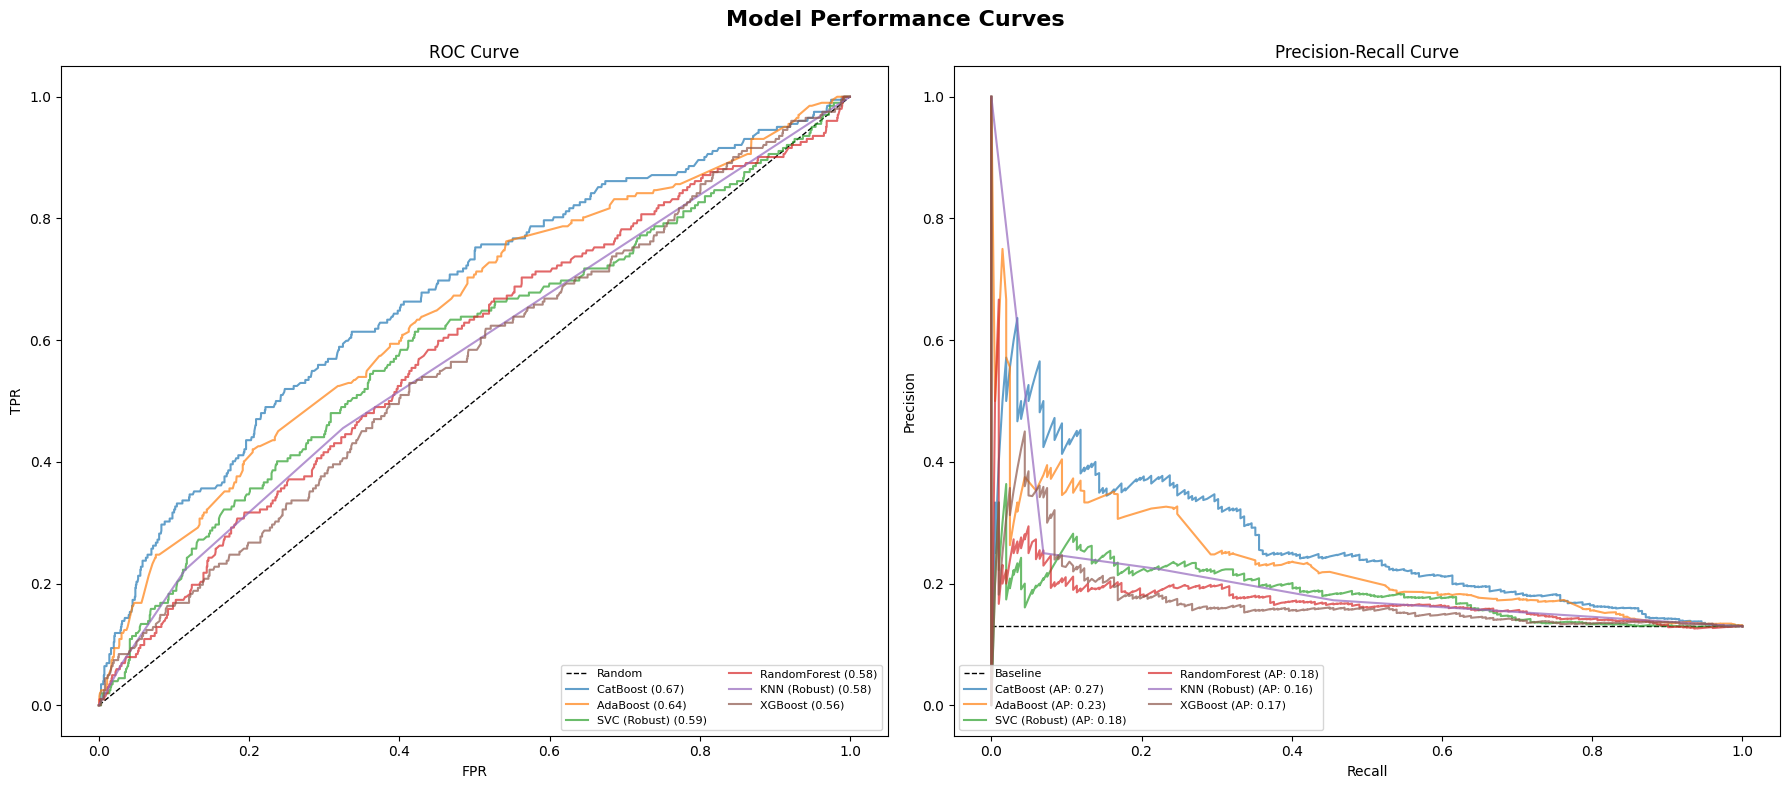

/tmp/ipython-input-282627437.py:306: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(df_results))


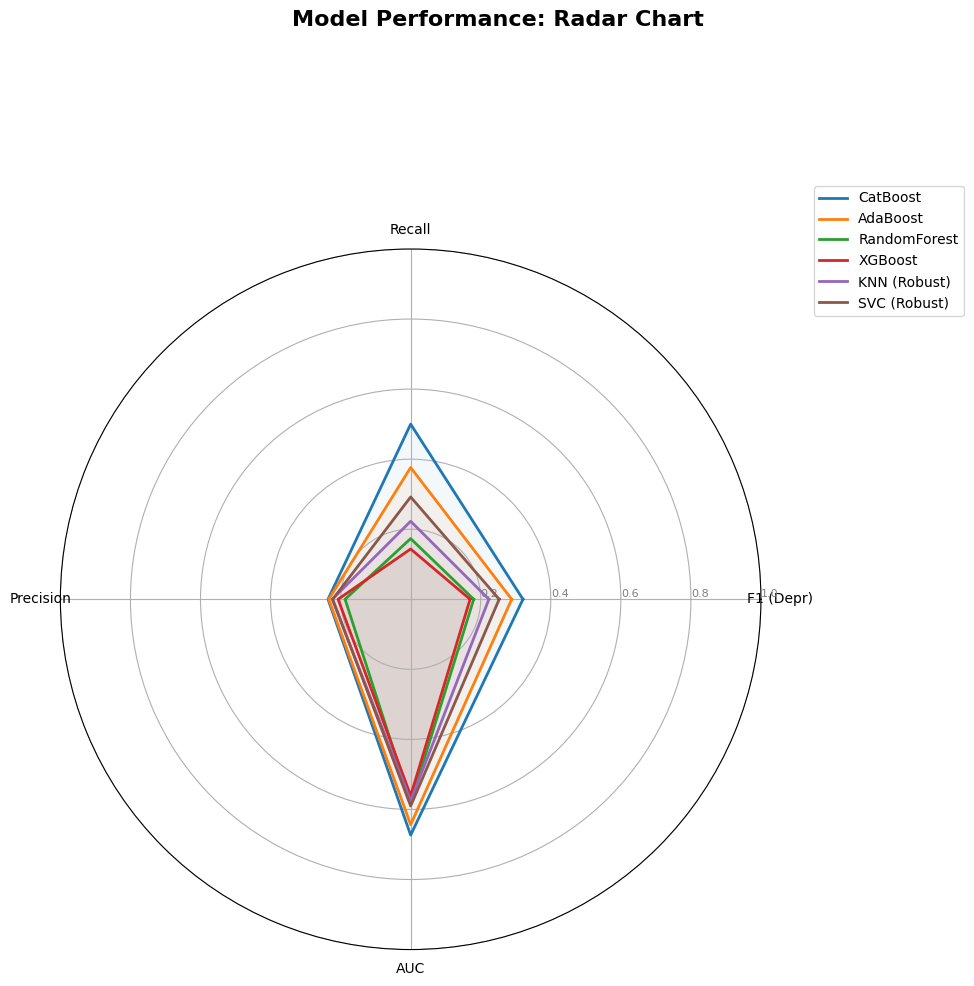

In [50]:
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import pi
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (f1_score, accuracy_score, roc_auc_score,
                             roc_curve, auc, precision_recall_curve,
                             average_precision_score, precision_score, recall_score)

# Smote+Tomek handling of imbalance data
from imblearn.combine import SMOTETomek
from collections import Counter

# =========================================================================
# NOTE: This script assumes 'cleaned_data', 'encoded_data', 'signif_num_cols',
# and 'signif_cat_cols' are defined before running.
# =========================================================================

# =========================================================================
# 1. DATA SETUP (Dual Streams)
# =========================================================================
# Placeholder check to ensure code runs in isolation if variables aren't present
if 'cleaned_data' not in locals():
    print("WARNING: 'cleaned_data' and 'encoded_data' not found. Please load your datasets first.")
else:
    target = "Depression"

    # --- Stream A: Raw Data (For CatBoost) ---
    X_cat = cleaned_data[signif_cat_cols + signif_num_cols].copy()
    y_cat = cleaned_data[target].astype(int)
    for col in signif_cat_cols:
        X_cat[col] = X_cat[col].astype(str)

    X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(
        X_cat, y_cat, test_size=0.2, stratify=y_cat, random_state=42
    )

    # --- Stream B: Encoded Data (For RF, XGB, Ada, KNN, SVC) ---
    X_enc = encoded_data.drop(columns=[target])
    y_enc = encoded_data[target].astype(int)

    X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(
        X_enc, y_enc, test_size=0.2, stratify=y_enc, random_state=42
    )

    # Shared Settings
    cv_splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    results = []

    # =========================================================================
    # 2. MODEL TRAINING LOOPS
    # =========================================================================
    # Updated Header to include F1 (Weighted) and F1 (Depression/Minority)
    print(f"\n{'Scaler':<10} | {'Model':<15} | {'F1 (W)':<8} | {'F1 (Depr)':<9} | {'AUC':<8} | {'ACC':<8} | {'Time':<6}")
    print("-" * 90)

    # -------------------------------------------------
    # GROUP 1: CATBOOST (Raw Data, Internal Balance, No Scale)
    # -------------------------------------------------
    start_t = time.time()

    # Use raw training data directly
    cb = CatBoostClassifier(verbose=0, random_state=42, auto_class_weights='Balanced', cat_features=signif_cat_cols)
    grid_cb = GridSearchCV(cb, {'iterations': [100,200], 'depth': [4, 6], 'learning_rate': [0.01,0.05]}, scoring='f1', cv=cv_splitter, n_jobs=-1)

    grid_cb.fit(X_train_cat, y_train_cat)
    best_cb = grid_cb.best_estimator_
    exe_time = time.time() - start_t

    # Evaluate
    y_pred = best_cb.predict(X_test_cat)

    # Calculate both Weighted and Minority Class F1
    f1_w = f1_score(y_test_cat, y_pred, average='weighted')
    f1_min = f1_score(y_test_cat, y_pred, pos_label=1)

    acc = accuracy_score(y_test_cat, y_pred)
    prec = precision_score(y_test_cat, y_pred)
    rec = recall_score(y_test_cat, y_pred)
    auc_score = roc_auc_score(y_test_cat, best_cb.predict_proba(X_test_cat)[:, 1])

    results.append({
        "Model": "CatBoost", "Scaler": "None",
        "F1_W": f1_w, "F1_Min": f1_min,
        "AUC": auc_score, "ACC": acc, "Precision": prec, "Recall": rec,
        "Model_Object": best_cb, "Test_Type": "Raw"
    })

    print(f"{'None':<10} | {'CatBoost':<15} | {f1_w:.4f}   | {f1_min:.4f}    | {auc_score:.4f}   | {acc:.4f}   | {exe_time:.2f}")

    # -------------------------------------------------
    # PREPARE SHARED DATA FOR GROUPS 2 & 3
    # -------------------------------------------------
    # Apply SMOTE directly to encoded training data
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X_train_enc, y_train_enc)

    # -------------------------------------------------
    # GROUP 2: TREE MODELS (Encoded, No Scale)
    # -------------------------------------------------
    # Handling imbalance data in the model param +SMOTE
    imbalance_ratio = y_res.value_counts()[0] / y_res.value_counts()[1]
    tree_models = {
        "AdaBoost": (AdaBoostClassifier(
                       estimator=DecisionTreeClassifier(max_depth=1, class_weight='balanced'),
                       random_state=42
                       ),
                        {'n_estimators': [100, 200]},
        ),
        "RandomForest": (RandomForestClassifier(
                           class_weight='balanced',
                           random_state=42
                           ),
                            {'n_estimators': [100, 200], 'max_depth': [10, 20]}
                         ),
         "XGBoost": (XGBClassifier(
             scale_pos_weight=imbalance_ratio,  # Add this parameter
             eval_metric="logloss",
             random_state=42
             ),
              {'n_estimators': [100, 200], 'max_depth': [3, 5]}
                     )
         }

    for name, (model, params) in tree_models.items():
        start_t = time.time()

        pipe = Pipeline([("model", model)])
        grid = GridSearchCV(pipe, {f"model__{k}": v for k, v in params.items()}, scoring='f1', cv=cv_splitter, n_jobs=-1)
        grid.fit(X_res, y_res)

        best_mod = grid.best_estimator_
        exe_time = time.time() - start_t

        y_pred = best_mod.predict(X_test_enc)

        f1_w = f1_score(y_test_enc, y_pred, average='weighted')
        f1_min = f1_score(y_test_enc, y_pred, pos_label=1)

        acc = accuracy_score(y_test_enc, y_pred)
        prec = precision_score(y_test_enc, y_pred)
        rec = recall_score(y_test_enc, y_pred)
        auc_score = roc_auc_score(y_test_enc, best_mod.predict_proba(X_test_enc)[:, 1])

        results.append({
            "Model": name, "Scaler": "None",
            "F1_W": f1_w, "F1_Min": f1_min,
            "AUC": auc_score, "ACC": acc, "Precision": prec, "Recall": rec,
            "Model_Object": best_mod, "Test_Type": "Encoded"
        })
        print(f"{'None':<10} | {name:<15} | {f1_w:.4f}   | {f1_min:.4f}    | {auc_score:.4f}   | {acc:.4f}   | {exe_time:.2f}")

    # -------------------------------------------------
    # GROUP 3: DISTANCE MODELS (Encoded, ONLY ROBUST SCALER)
    # -------------------------------------------------
    scale_name = "Robust"
    scaler_obj = RobustScaler()

    dist_models = {
        "KNN": (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
        "SVC": (SVC(probability=True, class_weight='balanced', random_state=42), {'C': [0.1, 1, 10], 'kernel': ['rbf']})
    }

    for model_name, (model, params) in dist_models.items():
        start_t = time.time()

        # Pipeline: Scaler -> Model
        pipe = Pipeline([("scaler", scaler_obj), ("model", model)])
        grid = GridSearchCV(pipe, {f"model__{k}": v for k, v in params.items()}, scoring='f1', cv=cv_splitter, n_jobs=-1)

        grid.fit(X_res, y_res)
        exe_time = time.time() - start_t

        best_mod = grid.best_estimator_
        y_pred = best_mod.predict(X_test_enc)

        f1_w = f1_score(y_test_enc, y_pred, average='weighted')
        f1_min = f1_score(y_test_enc, y_pred, pos_label=1)

        acc = accuracy_score(y_test_enc, y_pred)
        prec = precision_score(y_test_enc, y_pred)
        rec = recall_score(y_test_enc, y_pred)

        try:
            auc_score = roc_auc_score(y_test_enc, best_mod.predict_proba(X_test_enc)[:, 1])
        except:
            auc_score = 0.5

        results.append({
            "Model": model_name, "Scaler": scale_name,
            "F1_W": f1_w, "F1_Min": f1_min,
            "AUC": auc_score, "ACC": acc, "Precision": prec, "Recall": rec,
            "Model_Object": best_mod, "Test_Type": "Encoded"
        })
        print(f"{scale_name:<10} | {model_name:<15} | {f1_w:.4f}   | {f1_min:.4f}    | {auc_score:.4f}   | {acc:.4f}   | {exe_time:.2f}")

    # =========================================================================
    # 3. PLOTTING RESULTS
    # =========================================================================
    print("\n========== GENERATING PLOTS ==========")

    # Create a DataFrame for easy plotting
    df_results = pd.DataFrame(results)

    # Create a label for the plot that includes scaler info if present
    df_results['Model_Label'] = df_results.apply(
        lambda x: x['Model'] if x['Scaler'] == 'None' else f"{x['Model']} ({x['Scaler']})",
        axis=1
    )

    # 1. ROC and PR Curves
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))
    fig.suptitle(f"Model Performance Curves", fontsize=16, fontweight='bold')

    # --- ROC Settings ---
    ax_roc = axes[0]
    ax_roc.plot([0, 1], [0, 1], 'k--', lw=1, label='Random')

    # --- PR Settings ---
    ax_pr = axes[1]
    baseline = y_test_enc.mean()
    ax_pr.plot([0, 1], [baseline, baseline], 'k--', lw=1, label='Baseline')

    # Sort results by AUC to make legend cleaner
    results.sort(key=lambda x: x['AUC'], reverse=True)

    for row in results:
        model_name = row['Model']
        scaler_name = row['Scaler']
        model_obj = row['Model_Object']
        test_type = row['Test_Type']

        # Determine Label Name
        if scaler_name == "None":
            label_name = f"{model_name}"
        else:
            label_name = f"{model_name} ({scaler_name})"

        # Select correct test data
        if test_type == "Raw":
            X_curr, y_curr = X_test_cat, y_test_cat
        else:
            X_curr, y_curr = X_test_enc, y_test_enc

        # Plotting Curves
        if hasattr(model_obj, "predict_proba"):
            y_proba = model_obj.predict_proba(X_curr)[:, 1]

            # ROC
            fpr, tpr, _ = roc_curve(y_curr, y_proba)
            roc_val = auc(fpr, tpr)
            ax_roc.plot(fpr, tpr, lw=1.5, alpha=0.7, label=f"{label_name} ({roc_val:.2f})")

            # PR
            prec, rec, _ = precision_recall_curve(y_curr, y_proba)
            ap_val = average_precision_score(y_curr, y_proba)
            ax_pr.plot(rec, prec, lw=1.5, alpha=0.7, label=f"{label_name} (AP: {ap_val:.2f})")

    # Labels for Curves
    ax_roc.set_title("ROC Curve")
    ax_roc.set_xlabel("FPR")
    ax_roc.set_ylabel("TPR")
    ax_roc.legend(loc="lower right", fontsize=8, ncol=2)

    ax_pr.set_title("Precision-Recall Curve")
    ax_pr.set_xlabel("Recall")
    ax_pr.set_ylabel("Precision")
    ax_pr.legend(loc="lower left", fontsize=8, ncol=2)

    plt.tight_layout()
    plt.show()

    # 2. Multi-Metric Radar Chart (Quadrilateral Plot)
    # ACC removed from the radar chart as requested
    labels = ['F1_Min', 'Recall', 'Precision', 'AUC']
    display_labels = ['F1 (Depr)', 'Recall', 'Precision', 'AUC']
    num_vars = len(labels)

    # Compute angle for each axis
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1] # Close the loop

    fig2, ax2 = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    fig2.suptitle('Model Performance: Radar Chart', fontsize=16, fontweight='bold', y=1.05)

    # Draw one axe per variable + labels
    plt.xticks(angles[:-1], display_labels, size=10)

    # Draw ylabels
    ax2.set_rlabel_position(0)
    plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2", "0.4", "0.6", "0.8", "1.0"], color="grey", size=8)
    plt.ylim(0, 1)

    # Plot each model
    # Generate distinct colors
    colors = plt.cm.get_cmap('tab10', len(df_results))

    for idx, row in df_results.iterrows():
        values = row[labels].values.flatten().tolist()
        values += values[:1] # Close the loop

        ax2.plot(angles, values, linewidth=2, linestyle='solid', label=row['Model_Label'])
        ax2.fill(angles, values, alpha=0.05)

    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.tight_layout()
    plt.show()

**BEST MODEL INTERPRETABILITY - SHAP ANALYSIS**

Checking for existing models and data...
✓ CatBoost model found.
✓ Test datasets found.

========== CATBOOST SHAP ANALYSIS ==========
Plotting Global Importance...


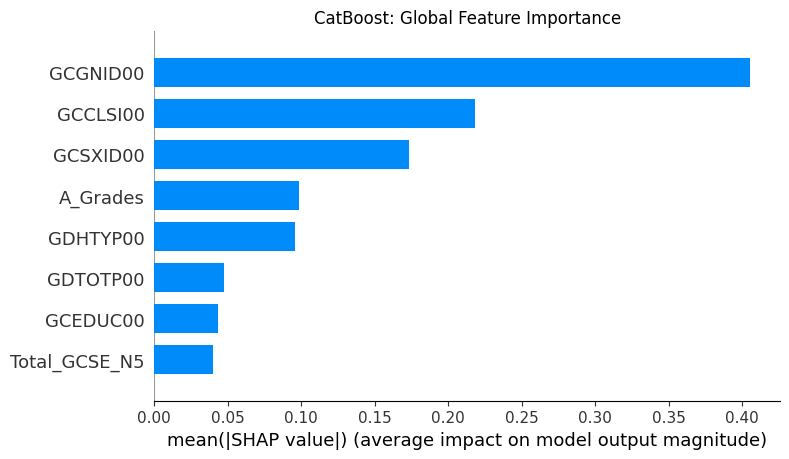

Plotting Beeswarm...


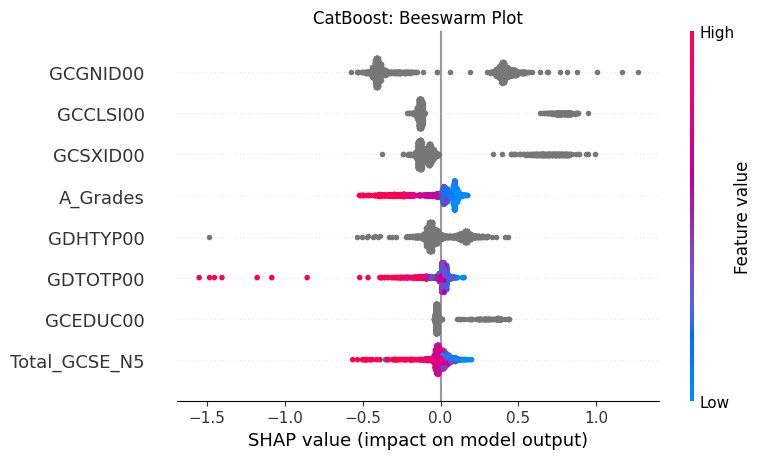

Plotting Dependence Plots for ALL variables...


<Figure size 640x480 with 0 Axes>

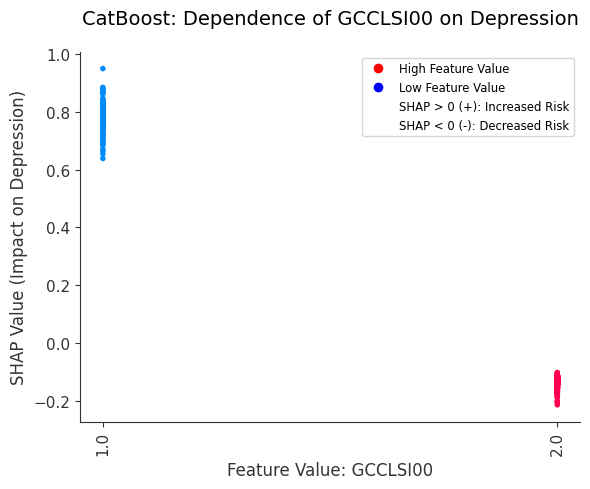

<Figure size 640x480 with 0 Axes>

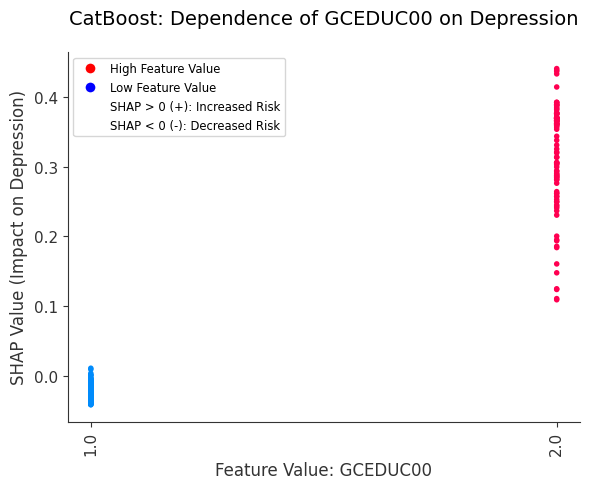

<Figure size 640x480 with 0 Axes>

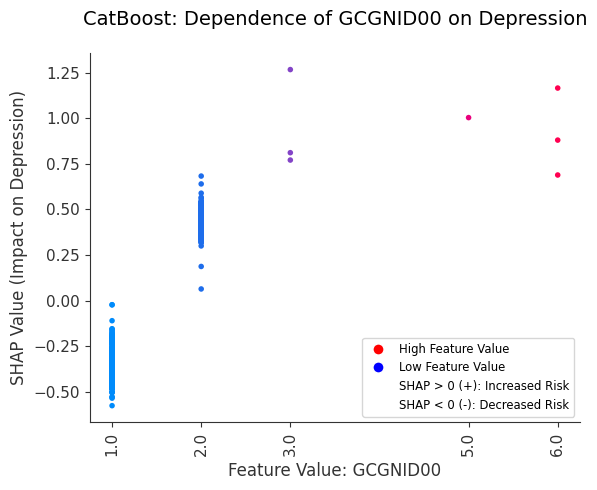

<Figure size 640x480 with 0 Axes>

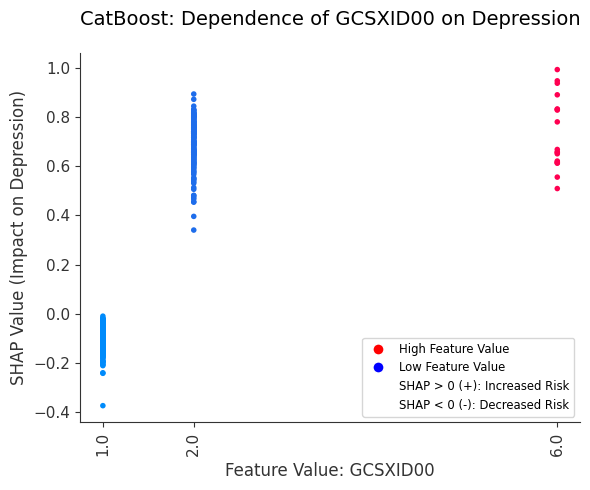

<Figure size 640x480 with 0 Axes>

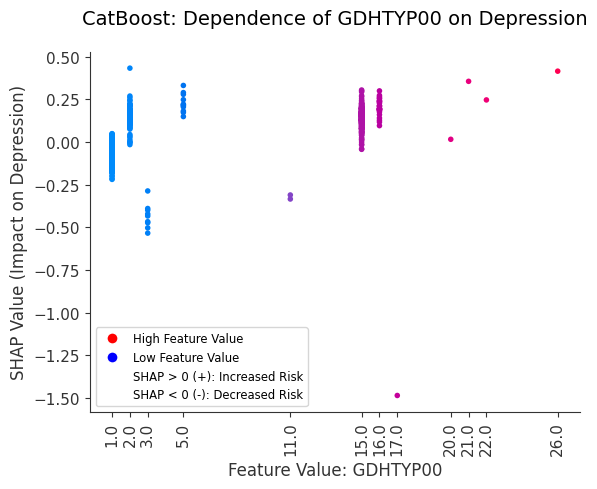

<Figure size 640x480 with 0 Axes>

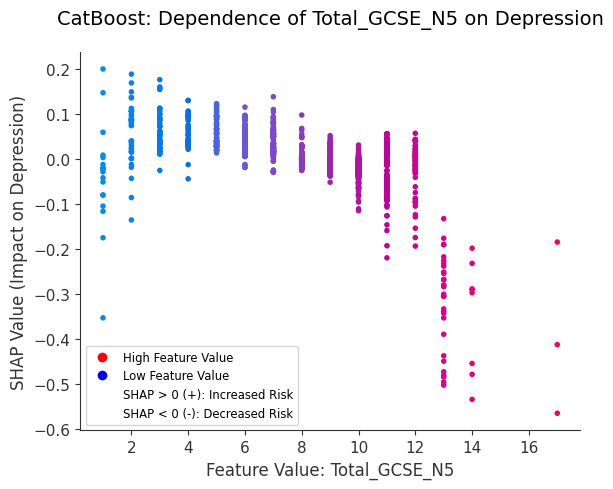

<Figure size 640x480 with 0 Axes>

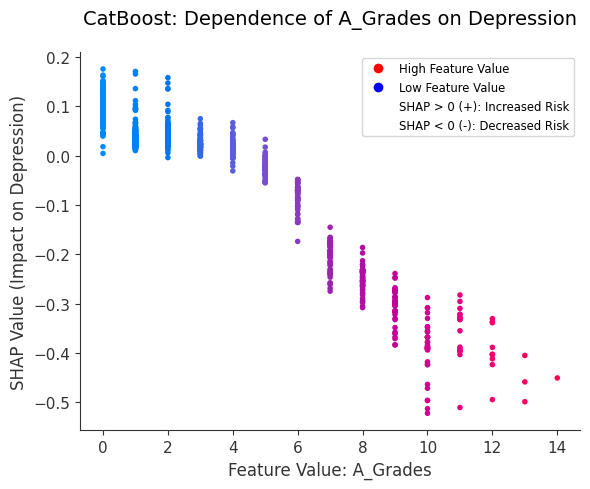

<Figure size 640x480 with 0 Axes>

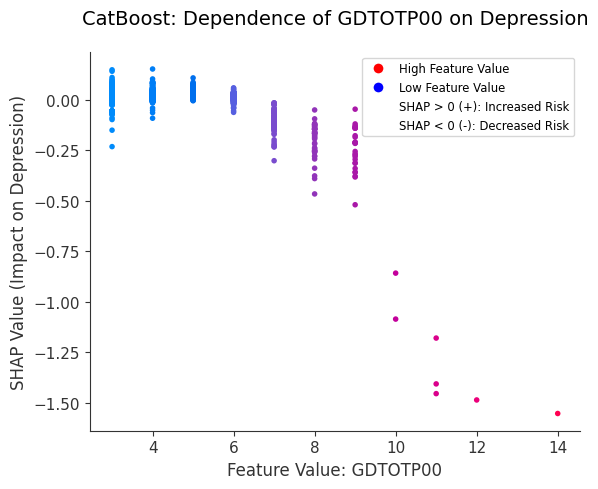

Plotting Waterfall Plot for the first observation...


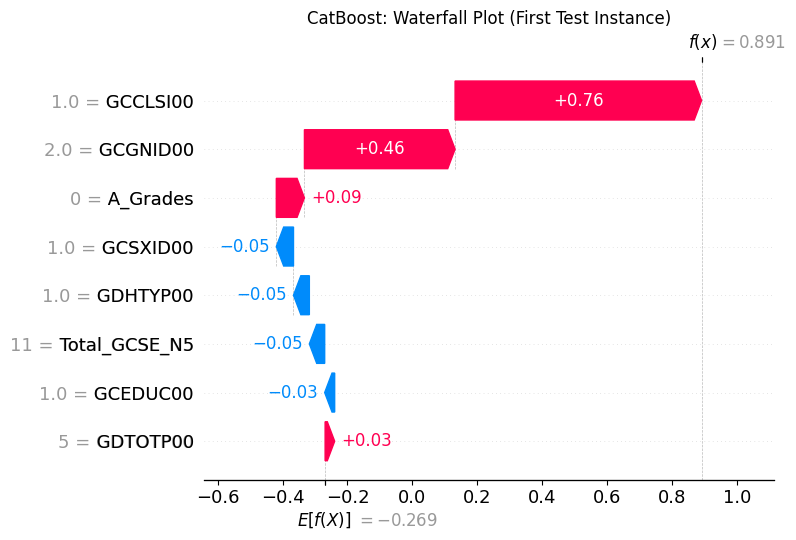

In [51]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# =========================================================================
# NOTE: This script is designed to run AFTER the model training script.
# It retrieves the already trained models (best_cb, results) from the environment.
# =========================================================================

# Optional: Configuration to make SHAP plots look nicer
shap.initjs()

print("Checking for existing models and data...")

# 1. Retrieve CatBoost (Defined globally in pipeline)
if 'best_cb' not in locals():
    print("Error: 'best_cb' not found. Please run the CatBoost training section of the pipeline first.")
    catboost_ready = False
else:
    catboost_ready = True
    print("✓ CatBoost model found.")


# 2. Check Data
if 'X_test_cat' not in locals() or 'X_test_enc' not in locals():
    print("Error: Test datasets (X_test_cat, X_test_enc) not found.")
    data_ready = False
else:
    data_ready = True
    print("✓ Test datasets found.")


# =========================================================================
#  CATBOOST SHAP ANALYSIS
# =========================================================================

if catboost_ready and data_ready:
    print("\n========== CATBOOST SHAP ANALYSIS ==========")

    try:
        # Create Tree Explainer
        explainer_cb = shap.TreeExplainer(best_cb)
        shap_values_cb = explainer_cb.shap_values(X_test_cat)

        # Handle multiclass output case if it happens
        if isinstance(shap_values_cb, list):
            shap_vals_to_plot = shap_values_cb[1]
        else:
            shap_vals_to_plot = shap_values_cb

        # --- A. Global Importance (Bar Chart) ---
        print("Plotting Global Importance...")
        plt.figure()
        plt.title("CatBoost: Global Feature Importance")
        shap.summary_plot(shap_vals_to_plot, X_test_cat, plot_type="bar", show=False)
        plt.tight_layout()
        plt.show()

        # --- B. Beeswarm Plot ---
        print("Plotting Beeswarm...")
        plt.figure()
        plt.title("CatBoost: Beeswarm Plot")
        shap.summary_plot(shap_vals_to_plot, X_test_cat, show=False)
        plt.tight_layout()
        plt.show()

        # --- C. Dependence Plots (ALL Variables) ---
        print("Plotting Dependence Plots for ALL variables...")
        for feat in X_test_cat.columns:
            plt.figure()

            # Generate standard dependence plot
            # interaction_index=feat ensures points are colored by the feature value itself
            shap.dependence_plot(
                feat,
                shap_vals_to_plot,
                X_test_cat,
                display_features=X_test_cat,
                show=False,
                interaction_index=feat
            )

            # Add clear labels and legend
            plt.xlabel(f"Feature Value: {feat}", fontsize=12)
            plt.ylabel("SHAP Value (Impact on Depression)", fontsize=12)
            plt.title(f"CatBoost: Dependence of {feat} on Depression", fontsize=14, pad=20)

            # Create a custom legend to explain the plot
            from matplotlib.lines import Line2D
            custom_lines = [
                Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='High Feature Value'),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='Low Feature Value'),
                Line2D([0], [0], color='black', lw=0, label='SHAP > 0 (+): Increased Risk'),
                Line2D([0], [0], color='black', lw=0, label='SHAP < 0 (-): Decreased Risk')
            ]
            plt.legend(handles=custom_lines, loc='best', fontsize='small', framealpha=0.8)

            plt.tight_layout()
            plt.show()

        # --- D. Waterfall Plot (First Observation) ---
        print("Plotting Waterfall Plot for the first observation...")
        plt.figure()
        # We need to create an Explanation object for the waterfall plot
        # The explainer(X) call generates an Explanation object
        explanation = explainer_cb(X_test_cat)

        # Check if output is list (multiclass) or single
        # If binary, explanation might be a single Explanation object with shape (N, Features)
        # Just taking the first instance directly

        shap.plots.waterfall(explanation[0], show=False)
        plt.title("CatBoost: Waterfall Plot (First Test Instance)")
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred during CatBoost SHAP analysis: {e}")


**SHAP FAIRNESS ANALYSIS**


========== CATBOOST SHAP WATERFALL (COUNTERFACTUAL ON GCGNID00) ==========
Original GCGNID00 value: 2.0


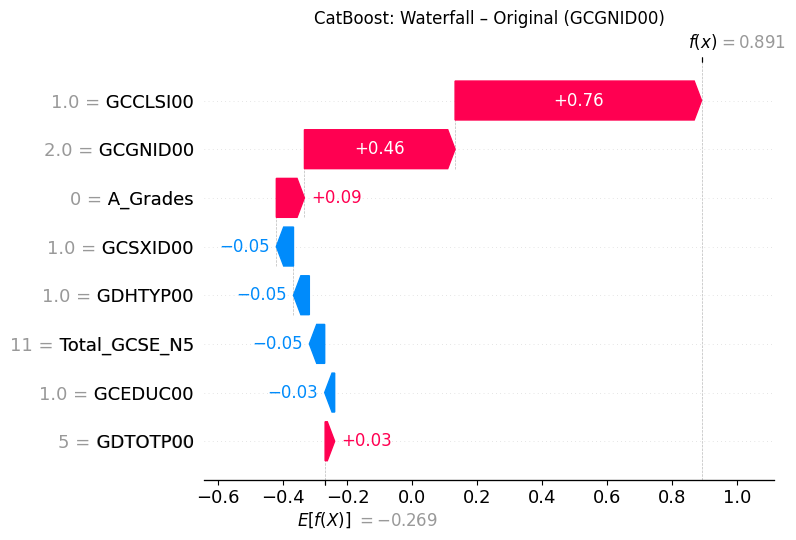

Counterfactual GCGNID00 value: 1


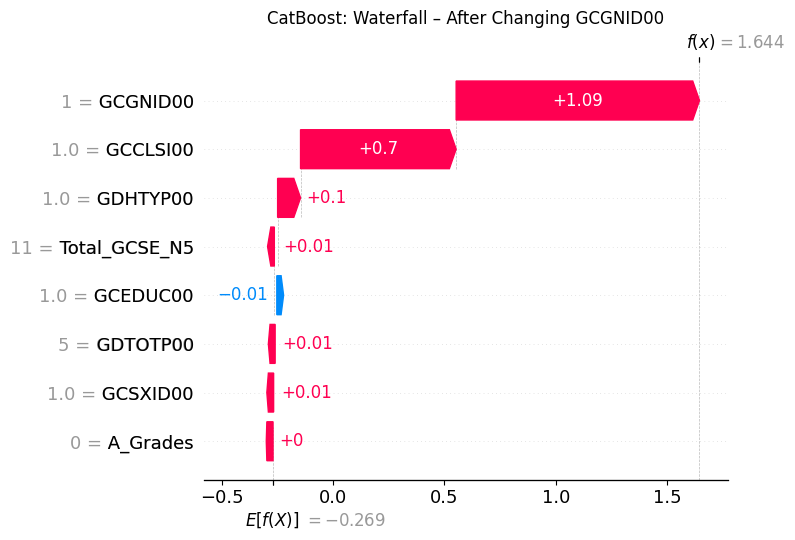

In [52]:
 # --- D. Waterfall Plot (First Observation: Before & After Changing GCGNID00) ---
print("\n========== CATBOOST SHAP WATERFALL (COUNTERFACTUAL ON GCGNID00) ==========")

# Index of the instance we want to inspect
idx = 0

# 1. Get original row for the first test instance
orig_row = X_test_cat.iloc[[idx]].copy()   # keep as DataFrame
print("Original GCGNID00 value:", orig_row["GCGNID00"].iloc[0])

# 2. SHAP explanation for the original instance
explanation_orig = explainer_cb(orig_row)  # returns a shap.Explanation object

# 3. Plot waterfall for the original instance
plt.figure()
shap.plots.waterfall(explanation_orig[0], show=False)
plt.title("CatBoost: Waterfall – Original (GCGNID00)", fontsize=12)
plt.tight_layout()
plt.show()

# 4. Create a counterfactual row by changing GCGNID00
cf_row = orig_row.copy()

# Rule: if 1 -> 2, if 2 -> 1, otherwise set to 1
current_gender = cf_row["GCGNID00"].iloc[0]
if float(current_gender) == 1.0:
    cf_row.loc[:, "GCGNID00"] = 2
elif float(current_gender) == 2.0:
    cf_row.loc[:, "GCGNID00"] = 1
else:
    # if it's 3–6 (other identities), force to 1 just to see the contrast
    cf_row.loc[:, "GCGNID00"] = 1

print("Counterfactual GCGNID00 value:", cf_row["GCGNID00"].iloc[0])

# 5. SHAP explanation for the counterfactual instance
explanation_cf = explainer_cb(cf_row)

# 6. Plot waterfall for the counterfactual instance
plt.figure()
shap.plots.waterfall(explanation_cf[0], show=False)
plt.title("CatBoost: Waterfall – After Changing GCGNID00", fontsize=12)
plt.tight_layout()
plt.show()



========== FAIRNESS ANALYSIS USING SHAP (group: GCGNID00) ==========

Mean total |SHAP| per group (overall model sensitivity by group):
GCGNID00
1.0    1.105461
2.0    1.127972
5.0    2.085481
6.0    2.249758
3.0    2.496361
Name: total_abs_shap, dtype: float64


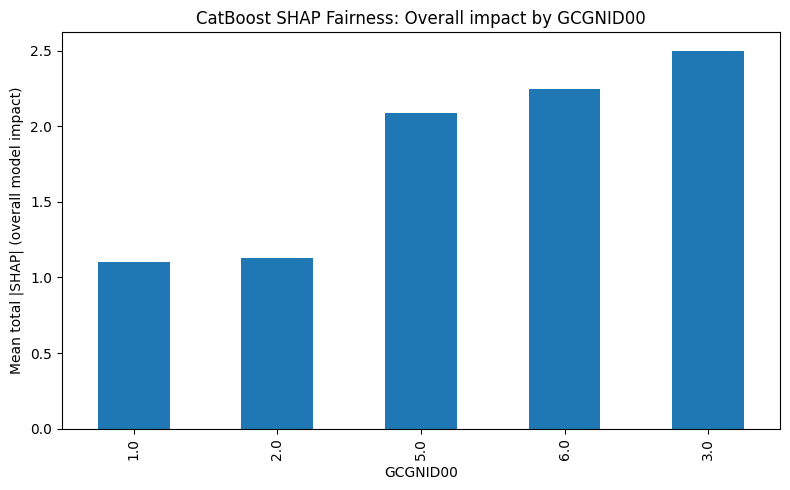


Computing mean |SHAP| per feature and group...

Top 10 features with largest SHAP mean difference across groups:
GCSXID00         0.494891
GCCLSI00         0.357499
GDTOTP00         0.183502
GDHTYP00         0.064719
Total_GCSE_N5    0.060311
A_Grades         0.056567
GCEDUC00         0.036990
dtype: float64


/tmp/ipython-input-1350623573.py:41: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  group_feature_mean = shap_df.groupby(group_col).apply(


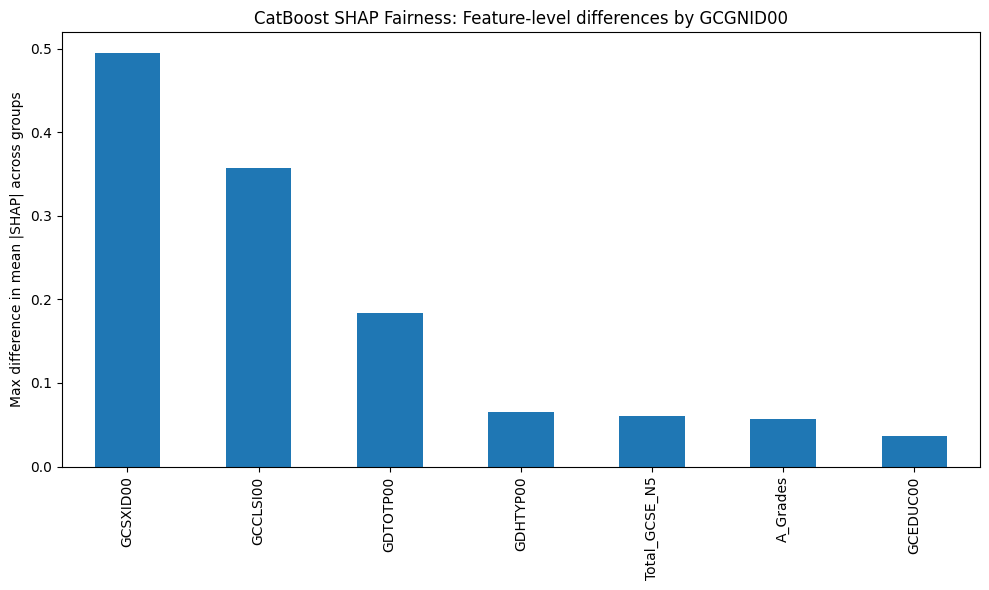

In [53]:
# =========================================================================
# 2. FAIRNESS ANALYSIS USING SHAP
#    A. SHAP MEAN DIFFERENCE ACROSS GROUPS
# =========================================================================

# Choose grouping column — example: gender identity
group_col = 'GCGNID00'  # Make sure this column exists in X_test_cat

if group_col in X_test_cat.columns:
    print(f"\n========== FAIRNESS ANALYSIS USING SHAP (group: {group_col}) ==========")

    # --- 2.1 OVERALL IMPACT PER GROUP -----------------------------------
    # Total |SHAP| per individual
    total_abs_shap = np.abs(shap_vals_to_plot).sum(axis=1)

    fairness_df = pd.DataFrame({
        group_col: X_test_cat[group_col].values,
        'total_abs_shap': total_abs_shap
    })

    group_overall = fairness_df.groupby(group_col)['total_abs_shap'].mean().sort_values()

    print("\nMean total |SHAP| per group (overall model sensitivity by group):")
    print(group_overall)

    plt.figure(figsize=(8, 5))
    group_overall.plot(kind='bar')
    plt.ylabel("Mean total |SHAP| (overall model impact)")
    plt.xlabel(group_col)
    plt.title(f"CatBoost SHAP Fairness: Overall impact by {group_col}")
    plt.tight_layout()
    plt.show()

    # --- 2.2 FEATURE-LEVEL MEAN |SHAP| BY GROUP -------------------------
    print("\nComputing mean |SHAP| per feature and group...")

    shap_df = pd.DataFrame(shap_vals_to_plot, columns=X_test_cat.columns)
    shap_df[group_col] = X_test_cat[group_col].values

    # mean |SHAP| per feature per group
    group_feature_mean = shap_df.groupby(group_col).apply(
        lambda df: np.abs(df.drop(columns=[group_col])).mean()
    )

    # Compute max difference across groups for each feature
    diff_across_groups = group_feature_mean.max() - group_feature_mean.min()

    # Top 10 features with biggest group differences (potential fairness flags)
    top_diff_features = diff_across_groups.sort_values(ascending=False).head(10)
    print("\nTop 10 features with largest SHAP mean difference across groups:")
    print(top_diff_features)

    # Plot
    plt.figure(figsize=(10, 6))
    top_diff_features.plot(kind='bar')
    plt.ylabel("Max difference in mean |SHAP| across groups")
    plt.title(f"CatBoost SHAP Fairness: Feature-level differences by {group_col}")
    plt.tight_layout()
    plt.show()

else:
    print(f"Column '{group_col}' not found in X_test_cat. Cannot run SHAP fairness analysis.")
